In [36]:
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA
from sklearn import datasets,decomposition,manifold
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.utils import resample
from sklearn.datasets import load_digits
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import scipy
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [44]:
df = pd.read_csv("/Users/Emma/Desktop/IE598 Machine Learning/MLF_GP1_CreditScore.csv")
#df.head

feature selection

(1700, 26) (1700,)
(1275, 26) (1275,)
       Sales/Revenues  Gross Margin       EBITDA  EBITDA Margin  \
count     1700.000000   1700.000000  1700.000000    1700.000000   
mean         0.050378      0.026007     0.068718       0.021074   
std          0.161910      0.273768     0.237365       0.189025   
min         -0.661715     -0.794722    -0.782254      -0.805153   
25%         -0.005693     -0.020028    -0.022640      -0.042771   
50%          0.034000      0.003403     0.049482       0.011134   
75%          0.083004      0.025595     0.124533       0.060566   
max          2.277229      3.202713     3.542425       4.141182   

       Net Income Before Extras   Total Debt     Net Debt      LT Debt  \
count               1700.000000  1700.000000  1700.000000  1700.000000   
mean                   0.123026     0.822405    -0.419810     1.255168   
std                   14.475689    13.317075    28.385702    16.224453   
min                 -289.000000    -0.903014  -493.305578    -

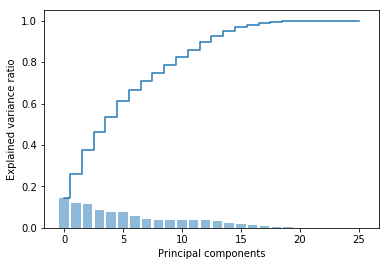

Training accuracy: 0.7694117647058824
Test accuracy: 0.7529411764705882
Training accuracy: 0.7717647058823529
Test accuracy: 0.7576470588235295
Training accuracy: 0.7741176470588236
Test accuracy: 0.7576470588235295


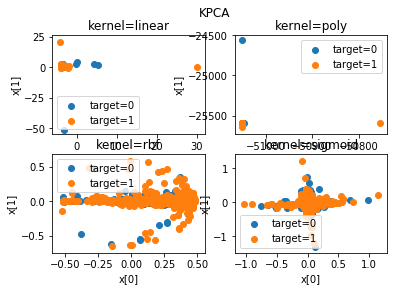

In [38]:
# Investment grid
df.isnull().any()

X, y = df.iloc[0:1700,0:26], df.InvGrd

print( X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)
print( X_train.shape, y_train.shape)

# Standardize the features

#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


#print summary of data frame
summary = X.describe()
print(summary)

print(df.head())
print(df.tail())

# Principal component analysis in scikit-learn


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)


pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


#
#plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
#plot_decision_regions(X_train_pca, y_train, classifier=lr)
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
#plt.legend(loc='lower left')
#plt.show()


pca.explained_variance_ratio_.shape      

plt.bar(range(0, 26), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0, 26), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()





pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(penalty='l1')
lr.fit(X_train_pca,y_train)

print('Training accuracy:', lr.score(X_train_pca, y_train))
print('Test accuracy:', lr.score(X_test_pca, y_test))

#y_train_pred = pca.predict(X_train_pca)
#print( metrics.accuracy_score(y_train, y_train_pred) )


#feat_labels = df[0:]
#
#importances = lr.feature_importances_
#indices = np.argsort(importances)[::-1]
#for f in range(X_train.shape[1]):
#    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
#plt.title('Feature Importance')
#plt.bar(range(X_train.shape[1]), importances[indices], align='center')
#plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
#plt.xlim([-1, X_train.shape[1]])
#plt.tight_layout()
#plt.show()




# ## LDA via scikit-learn




lda = LDA()
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

#lda.explained_variance_ratio_.shape      
#
#plt.bar(range(0, 26), lda.explained_variance_ratio_, alpha=0.5, align='center')
#plt.step(range(0, 26), np.cumsum(lda.explained_variance_ratio_), where='mid')
#plt.ylabel('Explained variance ratio')
#plt.xlabel('Principal components')
#
#plt.show()

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
print('Training accuracy:', lr.score(X_train_lda, y_train))
print('Test accuracy:', lr.score(X_test_lda, y_test))




#plot_decision_regions(X_train_lda, y_train, classifier=lr)
#plt.xlabel('LD 1')
#plt.ylabel('LD 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
#plt.show()
#
#
#plot_decision_regions(X_test_lda, y_test, classifier=lr)
#plt.xlabel('LD 1')
#plt.ylabel('LD 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
#plt.show()



# ## Kernel principal component analysis in scikit-learn

kpca = KernelPCA(n_components=15, kernel='sigmoid', gamma=10)
X_train_kpca = kpca.fit_transform(X_train_std, y_train)
X_test_kpca = kpca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_kpca, y_train)
print('Training accuracy:', lr.score(X_train_kpca, y_train))
print('Test accuracy:', lr.score(X_test_kpca, y_test))



decomposition.IncrementalPCA

def plot_KPCA(*data):
    X,y = data
    kernels = ['linear','poly','rbf','sigmoid']
    fig = plt.figure()

    for i,kernel in enumerate(kernels):
        kpca = decomposition.KernelPCA(n_components=15, kernel=kernel)
        kpca.fit(X_train)
        X_r = kpca.transform(X_train_std)
        ax = fig.add_subplot(2, 2, i+1)
        for label in np.unique(y):
            position = y_train == label
            ax.scatter(X_r[position,0],X_r[position,1],label="target=%d"%label)
            ax.set_xlabel('x[0]')
            ax.set_ylabel('x[1]')
            ax.legend(loc='best')
            ax.set_title('kernel=%s'% kernel)
    plt.suptitle("KPCA")
    plt.show()
plot_KPCA(X_train, y_train)


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',random_state=1)

tree.fit(X_train_pca, y_train)

print('Test Accuracy: %.3f' % tree.score(X_test_pca, y_test))
print('Train Accuracy: %.3f' % tree.score(X_train_pca, y_train))

tree.fit(X_train_lda, y_train)

print('Test Accuracy: %.3f' % tree.score(X_test_lda, y_test))
print('Train Accuracy: %.3f' % tree.score(X_train_lda, y_train))

tree.fit(X_train_kpca, y_train)

print('Test Accuracy: %.3f' % tree.score(X_test_kpca, y_test))
print('Train Accuracy: %.3f' % tree.score(X_train_kpca, y_train))



Test Accuracy: 0.751
Train Accuracy: 1.000
Test Accuracy: 0.647
Train Accuracy: 1.000
Test Accuracy: 0.739
Train Accuracy: 1.000


Decision tree classifier

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',random_state=1)

tree.fit(X_train_pca, y_train)

print('Test Accuracy: %.3f' % tree.score(X_test_pca, y_test))
print('Train Accuracy: %.3f' % tree.score(X_train_pca, y_train))


Test Accuracy: 0.751
Train Accuracy: 1.000


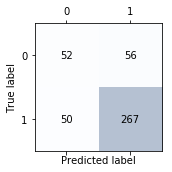

In [30]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = tree.predict(X_test_pca)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [31]:
param_range = np.arange(1,20)
param_grid = {"max_depth": param_range}

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train_pca, y_train)

print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train_pca, y_train)

print('Test accuracy: %.3f' % clf.score(X_test_pca, y_test))
print('Train accuracy: %.3f' % clf.score(X_train_pca, y_train))

0.7749019607843137
{'max_depth': 7}
Test accuracy: 0.765
Train accuracy: 0.896


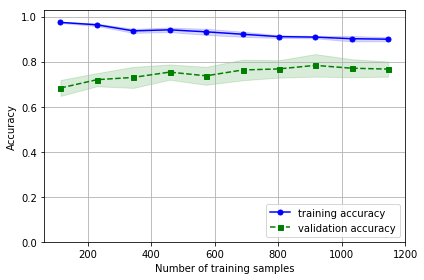

In [32]:
#debug the model
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

tree = DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=1)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=tree,
                               X=X_train_pca,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.03])
plt.tight_layout()
plt.show()

In [33]:
#import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(C=15.429399415040077, 
                          n_jobs=1, penalty='l2',
                          solver='lbfgs', 
                          tol=1e-06)

clf2 = DecisionTreeClassifier(max_depth=7,
                              criterion='gini',
                              random_state=1)

clf3 = SVC(kernel="rbf", C=100, gamma=0.1)

clf_labels = ['Logistic Regression', 'Decision tree', 'Kernel SVM']

print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_pca,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.76 (+/- 0.01) [Logistic Regression]
Accuracy: 0.77 (+/- 0.04) [Decision tree]
Accuracy: 0.82 (+/- 0.04) [Kernel SVM]


In [34]:
# Majority Rule (hard) Voting
from sklearn.ensemble import VotingClassifier
mv_clf = VotingClassifier(estimators=[('Logistive Regression', clf1),
                                      ('Decision Tree', clf2), 
                                      ('Kernel SVM', clf3)],
                                        voting='hard')

for clf, label in zip([clf1,clf2,clf3,mv_clf],
                      ['Logistive Regression','Decision Tree','Kernel SVM','Ensemble']):
    scores = cross_val_score(estimator=clf,
                             X=X_train_pca,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.76 (+/- 0.01) [Logistive Regression]
Accuracy: 0.77 (+/- 0.04) [Decision Tree]
Accuracy: 0.82 (+/- 0.04) [Kernel SVM]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Accuracy: 0.80 (+/- 0.03) [Ensemble]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [35]:
mv_clf.fit(X_train_pca,y_train)
y_pred = mv_clf.predict(X_test_pca)
metrics.accuracy_score(y_pred,y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7905882352941176

(1700, 26) (1700,)
(1275, 26) (1275,)


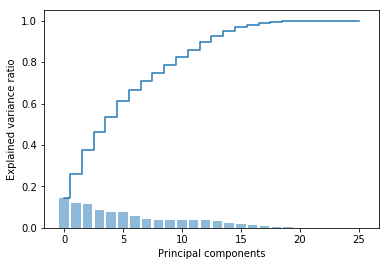

Training accuracy: 1.0
Test accuracy: 0.27058823529411763
Training accuracy: 1.0
Test accuracy: 0.2564705882352941
Training accuracy: 1.0
Test accuracy: 0.24941176470588236


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Investment grid
df.isnull().any()

X, y = df.iloc[0:1700,0:26], df.Rating

print( X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)
print( X_train.shape, y_train.shape)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)


pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


#
#plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
#plot_decision_regions(X_train_pca, y_train, classifier=lr)
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
#plt.legend(loc='lower left')
#plt.show()


pca.explained_variance_ratio_.shape      

plt.bar(range(0, 26), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0, 26), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()





pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

tree = DecisionTreeClassifier(criterion='gini',random_state=1)

tree.fit(X_train_pca, y_train)

print('Training accuracy:', tree.score(X_train_pca, y_train))
print('Test accuracy:', tree.score(X_test_pca, y_test))


#feat_labels = df[0:]
#
#importances = lr.feature_importances_
#indices = np.argsort(importances)[::-1]
#for f in range(X_train.shape[1]):
#    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
#plt.title('Feature Importance')
#plt.bar(range(X_train.shape[1]), importances[indices], align='center')
#plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
#plt.xlim([-1, X_train.shape[1]])
#plt.tight_layout()
#plt.show()




# ## LDA via scikit-learn
lda = LDA()
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

#lda.explained_variance_ratio_.shape      
#
#plt.bar(range(0, 26), lda.explained_variance_ratio_, alpha=0.5, align='center')
#plt.step(range(0, 26), np.cumsum(lda.explained_variance_ratio_), where='mid')
#plt.ylabel('Explained variance ratio')
#plt.xlabel('Principal components')
#
#plt.show()

tree = DecisionTreeClassifier(criterion='gini',random_state=1)
tree.fit(X_train_lda, y_train)

print('Training accuracy:', tree.score(X_train_lda, y_train))
print('Test accuracy:', tree.score(X_test_lda, y_test))





#plot_decision_regions(X_train_lda, y_train, classifier=lr)
#plt.xlabel('LD 1')
#plt.ylabel('LD 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
#plt.show()
#
#
#plot_decision_regions(X_test_lda, y_test, classifier=lr)
#plt.xlabel('LD 1')
#plt.ylabel('LD 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
#plt.show()



# ## Kernel principal component analysis in scikit-learn

kpca = KernelPCA(n_components=15, kernel='sigmoid', gamma=10)
X_train_kpca = kpca.fit_transform(X_train_std, y_train)
X_test_kpca = kpca.transform(X_test_std)

tree = DecisionTreeClassifier(criterion='gini',random_state=1)

tree.fit(X_train_kpca, y_train)

print('Training accuracy:', tree.score(X_train_kpca, y_train))
print('Test accuracy:', tree.score(X_test_kpca, y_test))




In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',random_state=1)

tree.fit(X_train_pca, y_train)

print('Test Accuracy: %.3f' % tree.score(X_test_pca, y_test))
print('Train Accuracy: %.3f' % tree.score(X_train_pca, y_train))

tree.fit(X_train_lda, y_train)

print('Test Accuracy: %.3f' % tree.score(X_test_lda, y_test))
print('Train Accuracy: %.3f' % tree.score(X_train_lda, y_train))

tree.fit(X_train_kpca, y_train)

print('Test Accuracy: %.3f' % tree.score(X_test_kpca, y_test))
print('Train Accuracy: %.3f' % tree.score(X_train_kpca, y_train))



Test Accuracy: 0.271
Train Accuracy: 1.000
Test Accuracy: 0.256
Train Accuracy: 1.000
Test Accuracy: 0.249
Train Accuracy: 1.000


Test Accuracy: 0.271
Train Accuracy: 1.000


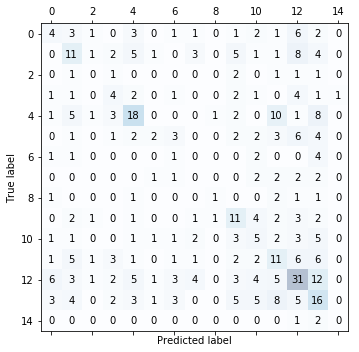

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.2847058823529412
{'max_depth': 19}
Test accuracy: 0.282
Train accuracy: 0.947


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',random_state=1)

tree.fit(X_train_pca, y_train)

print('Test Accuracy: %.3f' % tree.score(X_test_pca, y_test))
print('Train Accuracy: %.3f' % tree.score(X_train_pca, y_train))

#confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = tree.predict(X_test_pca)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

#tuning
param_range = np.arange(1,20)
param_grid = {"max_depth": param_range}

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train_pca, y_train)

print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train_pca, y_train)

print('Test accuracy: %.3f' % clf.score(X_test_pca, y_test))
print('Train accuracy: %.3f' % clf.score(X_train_pca, y_train))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


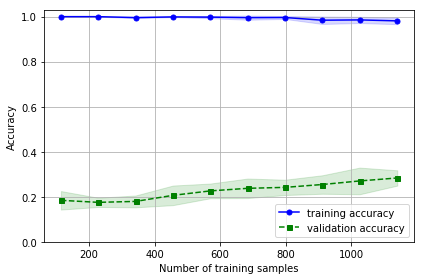

In [43]:
#debug the model
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

tree = DecisionTreeClassifier(criterion='gini',max_depth=19,random_state=1)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=tree,
                               X=X_train_pca,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.03])
plt.tight_layout()
plt.show()


ensemble

In [21]:
#import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = KNeighborsClassifier(n_neighbors=1, 
                        p=2, 
                        metric='minkowski',
                        algorithm='auto',
                        leaf_size=1,
                        weights='uniform')

clf2 = DecisionTreeClassifier(max_depth=7,
                              criterion='gini',
                              random_state=1)

clf3 = SVC(kernel="rbf", C=100, gamma=1)

clf_labels = ['KNN', 'Decision tree', 'Kernel SVM']

print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_pca,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.41 (+/- 0.04) [KNN]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.24 (+/- 0.02) [Decision tree]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.39 (+/- 0.03) [Kernel SVM]


In [22]:
# Majority Rule (hard) Voting
from sklearn.ensemble import VotingClassifier
mv_clf = VotingClassifier(estimators=[('KNN', clf1),
                                      ('Decision Tree', clf2), 
                                      ('Kernel SVM', clf3)],
                                        voting='hard')

for clf, label in zip([clf1,clf2,clf3,mv_clf],
                      ['KNN','Decision Tree','Kernel SVM','Ensemble']):
    scores = cross_val_score(estimator=clf,
                             X=X_train_pca,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.41 (+/- 0.04) [KNN]
Accuracy: 0.24 (+/- 0.02) [Decision Tree]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.39 (+/- 0.03) [Kernel SVM]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this 

Accuracy: 0.40 (+/- 0.03) [Ensemble]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [25]:
mv_clf.fit(X_train_pca,y_train)
y_pred = mv_clf.predict(X_test_pca)
metrics.accuracy_score(y_pred,y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.40941176470588236